In [4]:
#install required libraries
import pandas as pd
import numpy as np
#data visualization packages
import matplotlib.pyplot as plt
#keras packages
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
#from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dropout
#model evaluation packages
from sklearn.metrics import f1_score, roc_auc_score, log_loss
from sklearn.model_selection import cross_val_score, cross_validate

In [5]:
#read mnist fashion dataset
mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [6]:
#reshape data from 3-D to 2-D array
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
#feature scaling
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
#fit and transform training dataset
X_train = minmax.fit_transform(X_train)
#transform testing dataset
X_test = minmax.transform(X_test)
print('Number of unique classes: ', len(np.unique(y_train)))
print('Classes: ', np.unique(y_train))

Number of unique classes:  10
Classes:  [0 1 2 3 4 5 6 7 8 9]


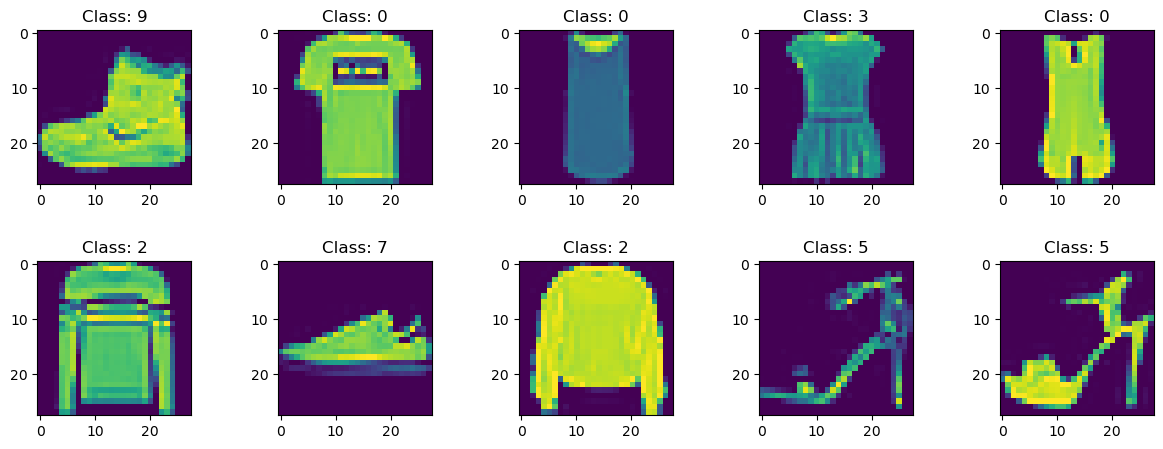

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(15,5))          
ax = axes.ravel()
for i in range(10):
    ax[i].imshow(X_train[i].reshape(28,28))
    ax[i].title.set_text('Class: ' + str(y_train[i]))              
plt.subplots_adjust(hspace=0.5)                                    
plt.show()

In [ ]:
### Building ANN model using one dense layer

In [14]:
#initializing CNN model
classifier_e25 = Sequential()
#add 1st hidden layer
classifier_e25.add(Dense(input_dim = X_train.shape[1], units = 256, kernel_initializer='uniform', activation='relu'))
#add output layer
classifier_e25.add(Dense(units = 10, kernel_initializer='uniform', activation='softmax'))
#compile the neural network
classifier_e25.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model summary
classifier_e25.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
### Training ANN model

In [15]:
#fit training dataset into the model
classifier_e25_fit = classifier_e25.fit(X_train, y_train, epochs=25, verbose=1)

Epoch 1/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4984 - accuracy: 0.8237
Epoch 2/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3672 - accuracy: 0.8667
Epoch 3/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3313 - accuracy: 0.8784
Epoch 4/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3038 - accuracy: 0.8882
Epoch 5/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2867 - accuracy: 0.8940
Epoch 6/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2712 - accuracy: 0.8996
Epoch 7/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2601 - accuracy: 0.9035
Epoch 8/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2482 - accuracy: 0.9069
Epoch 9/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2369 - accuracy: 0.9102
Epoch 10/25
1875/1875 [==============================] - 3s 1ms/step - loss: 0.227

In [19]:
test_loss_e25 = classifier_e25.evaluate(X_test, y_test, verbose=0)
# Get raw predictions
raw_predictions = classifier_e25.predict(X_test)
# Convert raw predictions to class probabilities
class_probabilities = raw_predictions
# Convert class probabilities to class predictions
predicted_classes = np.argmax(class_probabilities, axis=1)
# Calculate F1 score
f1_e25 = f1_score(y_test, predicted_classes, average='micro')
# Calculate ROC AUC score
roc_e25 = roc_auc_score(y_test, class_probabilities, multi_class='ovo')
# Create evaluation dataframe
stats_e25 = pd.DataFrame({
    'Test accuracy': round(test_loss_e25[1]*100, 3),
    'F1 score': round(f1_e25, 3),
    'ROC AUC score': round(roc_e25, 3),
    'Total Loss': round(test_loss_e25[0], 3)
}, index=[0])

# Print evaluation dataframe
display(stats_e25)

313/313 [==============================] - 0s 794us/step


,Test accuracy,F1 score,ROC AUC score,Total Loss
0,88.93,0.889,0.991,0.384
